In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Methodology from desy3 peaks https://arxiv.org/pdf/2110.10135.pdf

In DESY3 peaks analysis, the redshift uncertainty is treated as a nuisance parameter $\Delta_{z,i}$ where i is thee tomographic bin index. 
So the redshift uncertainty is modeled as $n_{i}^{\prime}(z) = n_i(z - \Delta_{z,i})$. Cosmology dependence is neglected.
The way the data vector changes because of \Delta_{z,i} is modeled as follows:

$d_j(\Omega_m, \sigma_8, \Delta_{z,i}) = d_j(\Omega_m, \sigma_8, \Delta_{z,i}=0)(1 + f_{i,j}(\Delta_{z,i}))$

where $d_j$ is the j-th element of the data vector --> $f_{i,j}$ is for the j-th element in tomo bin i. This is modeled as a quadratic polynomial $f_{i,j}(\Delta_{z,i}) = c_{i,j}^{1}\Delta_{z,i} + c_{i,j}^{2}\Delta_{z,i}^2$

- How to get the $c_{i,j}^{1}$ and $c_{i,j}^{2}$?

For each element of the data vector (peaks$^{1}_{1}$, peaks$^{1}_{2}$, peaks$^{1}_{3}$, ..., peaks$^{1}_{N}$), where the apex 1 is the `tomo_bin = 1` based on a set of simulations obtained at a fixed cosmology and using $n^{i}(z) = n^{i}(z) + \Delta_{z,i}$

In [3]:
#question about the sentence "The simulations span the range Δ𝑧,𝑖 ∈ [−0.1, 0.1] in nine linearly spaced steps with 200 realisations each."

### Test at map level and summary statistics level the effective map obtained with $n^{i}(z) = n^{i}(z) + \Delta_{z,i} $

In [4]:
n_z_bin_list = ['../../data/redshift_distributions/desy3_nz_metacal_bin{}.txt'.format(m) for m in range(1,5)]

In [5]:
n_z_lensing = np.array([np.loadtxt(nz) for nz in n_z_bin_list])

In [6]:
delta_z = 0.1

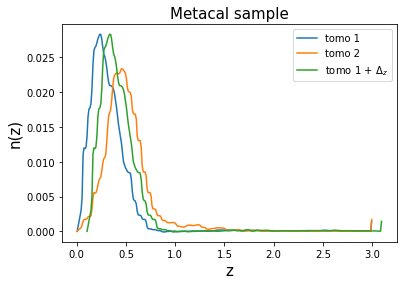

In [7]:
for i in range(2):
    plt.plot(n_z_lensing[i, :, 0], n_z_lensing[i, :, 1], label = f'tomo {i+1}')
    plt.xlabel('z', fontsize = 15)
    plt.ylabel('n(z)', fontsize = 15)
    plt.title('Metacal sample', fontsize = 15)
plt.plot(n_z_lensing[0, :, 0]+delta_z, n_z_lensing[0, :, 1], label = 'tomo 1 + $\Delta_z$')
plt.legend()

## Use simple smail

In [8]:
def nz_function(redshift, alpha=1.5, beta=1.1, redshift_0=0.31): 
    return np.power(redshift, 2.) * \
            np.exp(-np.power((np.divide(redshift, redshift_0)), beta))

In [9]:
smail_bin1 = nz_function(n_z_lensing[i, :, 0])
smail_deltaz = nz_function(n_z_lensing[i, :, 0]-0.1)

/tmp/ipykernel_33112/3230533669.py:3: RuntimeWarning: invalid value encountered in power
  np.exp(-np.power((np.divide(redshift, redshift_0)), beta))


In [10]:
smail_bin1.shape

(300,)

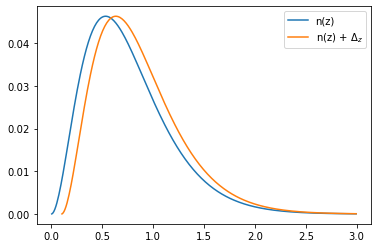

In [11]:
plt.plot(n_z_lensing[i, :, 0], smail_bin1, label = 'n(z)')
plt.plot(n_z_lensing[i, :, 0], smail_deltaz, label = 'n(z) + $\Delta_z$')
plt.legend()

## or 

In [12]:
smail_bin1 = nz_function(n_z_lensing[i, :, 0])
smail_bin2 = nz_function(n_z_lensing[i, :, 0] -0.2)
smail_deltaz = nz_function(n_z_lensing[i, :, 0]-0.1)

/tmp/ipykernel_33112/3230533669.py:3: RuntimeWarning: invalid value encountered in power
  np.exp(-np.power((np.divide(redshift, redshift_0)), beta))


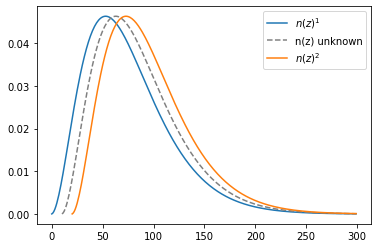

In [13]:
plt.plot(smail_bin1, label = '$n(z)^1$')
plt.plot(smail_deltaz, label = 'n(z) unknown', linestyle = '--', color = 'gray')
plt.plot(smail_bin2, label = '$n(z)^2$')
plt.legend()